## GlADE+ catalog visualization

In this notebook, we use the `healpy` library to visualize the data output from the `parse_catalog` script. We follow the tutorial provided in the [`healpy` documentation](https://healpy.readthedocs.io/en/latest/tutorial.html).

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import healpy as hp
import h5py

In [8]:
# Constants
nside = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        nside, hp.nside2resol(nside, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [9]:
filename = "GLADE+reduced.txt"
%run -i -t parse_catalog.py {filename}  -v --nside {nside}

Starting catalog parsing...
Reader chunk size: 100000
Parsed chunk number 10
Parsed catalog has 796256 rows
203744 rows filtered out
79.6% rows included
-------------------------------------------
Parsed chunk number 20
Parsed catalog has 1471404 rows
528596 rows filtered out
73.6% rows included
-------------------------------------------
Parsed chunk number 30
Parsed catalog has 2456378 rows
543622 rows filtered out
81.9% rows included
-------------------------------------------
Parsed chunk number 40
Parsed catalog has 3454621 rows
545379 rows filtered out
86.4% rows included
-------------------------------------------
Parsed chunk number 50
Parsed catalog has 4453886 rows
546114 rows filtered out
89.1% rows included
-------------------------------------------
Parsed chunk number 60
Parsed catalog has 5453377 rows
546623 rows filtered out
90.9% rows included
-------------------------------------------
Parsed chunk number 70
Parsed catalog has 6451932 rows
548068 rows filtered out
92.

Number of pixels in the map:

In [10]:
npix = hp.nside2npix(nside)
npix

12288

Importing file:

In [11]:
f = h5py.File('output.hdf5', 'r')
list(f.keys())

['dec', 'ra', 'skymap', 'z']

The `skymap` dataset holds the corresponding pixel for each galaxy. In the cell below, we convert this information into an array of length `npix` holding the number of galaxies within each pixel:

<HDF5 dataset "skymap": shape (21872254,), type "<i8">


[2732. 2365. 2929. ...  625. 1624.  648.]


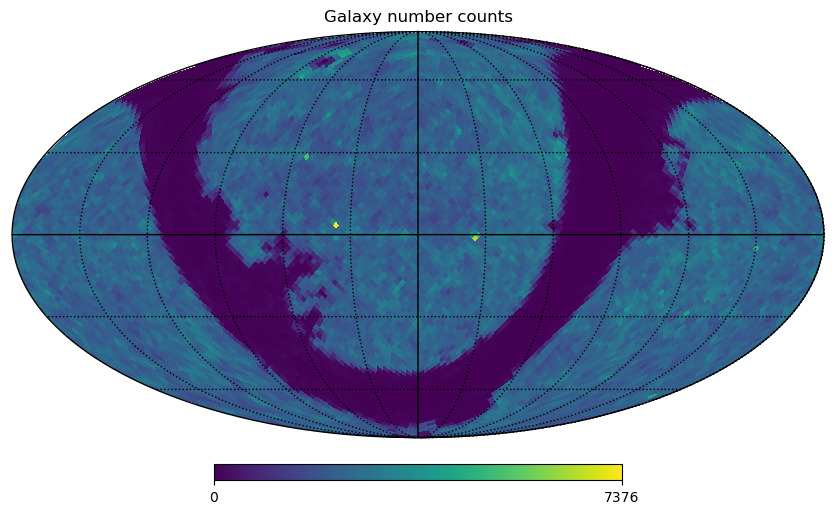

In [12]:
skymap_indices = f['skymap']
print(skymap_indices)
nonempty_pixels, counts = np.unique(skymap_indices, return_counts=True)
skymap = np.zeros(npix)
for pixel, count in zip(nonempty_pixels, counts):
    skymap[pixel] = count
print(skymap)
hp.mollview(skymap, title="Galaxy number counts")
hp.graticule()